In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

path ='s3_files/paris' # use your path
allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    df['date'] = file_
    list_.append(df)
frame = pd.concat(list_)

In [2]:
frame.head()

,accommodates,bathrooms,bedrooms,borough,city,country,date,host_id,last_modified,latitude,...,minstay,name,neighborhood,overall_satisfaction,price,property_type,reviews,room_id,room_type,survey_id
0,4,NaN,2.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0435_2016-...,32318670,2016-05-28 15:02:36.461396,48.890179,...,14.0,NaN,Epinettes,NaN,183.0,NaN,0,11387548,Entire home/apt,NaN
1,6,NaN,2.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0435_2016-...,15373479,2016-05-28 15:01:08.142988,48.884428,...,4.0,NaN,Clignancourt,4.5,201.0,NaN,7,3016646,Entire home/apt,NaN
2,5,NaN,2.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0435_2016-...,17234626,2016-05-28 14:59:53.744825,48.872106,...,2.0,NaN,Porte-Saint-Martin,NaN,138.0,NaN,0,9192873,Entire home/apt,NaN
3,4,NaN,2.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0435_2016-...,16964249,2016-05-28 14:59:35.280944,48.845801,...,3.0,NaN,Grenelle,NaN,92.0,NaN,2,7111862,Entire home/apt,NaN
4,2,NaN,1.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0435_2016-...,10229835,2016-05-28 14:52:35.797141,48.870084,...,5.0,NaN,Porte-Saint-Martin,5.0,109.0,NaN,23,1982586,Entire home/apt,NaN


In [3]:
frame.info()
paris = frame

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629621 entries, 0 to 70157
Data columns (total 22 columns):
accommodates            629621 non-null int64
bathrooms               0 non-null float64
bedrooms                629145 non-null float64
borough                 0 non-null float64
city                    262698 non-null object
country                 0 non-null float64
date                    629621 non-null object
host_id                 629621 non-null int64
last_modified           629621 non-null object
latitude                629621 non-null float64
location                262698 non-null object
longitude               629621 non-null float64
minstay                 115222 non-null float64
name                    135652 non-null object
neighborhood            629621 non-null object
overall_satisfaction    543234 non-null float64
price                   629611 non-null float64
property_type           135885 non-null object
reviews                 629621 non-null int64
room_i

In [4]:
# i am going to drop null values for accommodates 
paris = paris[np.isfinite(paris['accommodates'])]
paris = paris[np.isfinite(paris['price'])]

paris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629611 entries, 0 to 70157
Data columns (total 22 columns):
accommodates            629611 non-null int64
bathrooms               0 non-null float64
bedrooms                629145 non-null float64
borough                 0 non-null float64
city                    262698 non-null object
country                 0 non-null float64
date                    629611 non-null object
host_id                 629611 non-null int64
last_modified           629611 non-null object
latitude                629611 non-null float64
location                262698 non-null object
longitude               629611 non-null float64
minstay                 115222 non-null float64
name                    135652 non-null object
neighborhood            629611 non-null object
overall_satisfaction    543230 non-null float64
price                   629611 non-null float64
property_type           135885 non-null object
reviews                 629611 non-null int64
room_i

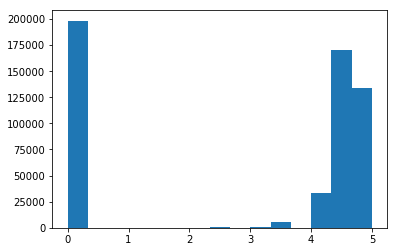

In [5]:
# i may impute overall satisfaction using the mean. first, i'll check out the distribution
rating_vals = paris[np.isfinite(paris['overall_satisfaction'])]
plt.hist(rating_vals.overall_satisfaction, bins=15)
plt.show()

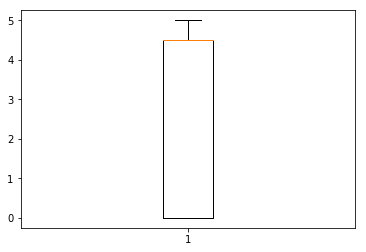

In [6]:
plt.boxplot(rating_vals.overall_satisfaction)
plt.show()

In [7]:
paris[paris['overall_satisfaction'] < 1]

,accommodates,bathrooms,bedrooms,borough,city,country,date,host_id,last_modified,latitude,...,minstay,name,neighborhood,overall_satisfaction,price,property_type,reviews,room_id,room_type,survey_id
0,1,NaN,1.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0762_2017-...,15669323,2017-01-03 17:52:52.270369,48.890375,...,NaN,NaN,Clignancourt,0.0,92.0,NaN,0,6057158,Shared room,NaN
1,1,NaN,1.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0762_2017-...,106863421,2017-01-03 17:52:52.268115,48.886701,...,NaN,NaN,Grandes-Carrières,0.0,92.0,NaN,0,16326530,Shared room,NaN
2,1,NaN,1.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0762_2017-...,95001052,2017-01-03 17:52:52.265788,48.842081,...,NaN,NaN,Auteuil,0.0,93.0,NaN,1,15535840,Shared room,NaN
3,2,NaN,1.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0762_2017-...,22530701,2017-01-03 17:52:50.752525,48.852422,...,NaN,NaN,Charonne,0.0,65.0,NaN,0,11771527,Shared room,NaN
5,2,NaN,1.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0762_2017-...,26095542,2017-01-03 17:52:50.745691,48.861540,...,NaN,NaN,Roquette,0.0,70.0,NaN,0,5515531,Shared room,NaN
6,1,NaN,1.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0762_2017-...,20548553,2017-01-03 17:52:48.467473,48.847386,...,NaN,NaN,Quinze-Vingts,0.0,65.0,NaN,0,16173285,Shared room,NaN
7,2,NaN,1.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0762_2017-...,26617709,2017-01-03 17:52:48.463249,48.866520,...,NaN,NaN,Folie-Méricourt,0.0,70.0,NaN,2,5148247,Shared room,NaN
8,2,NaN,1.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0762_2017-...,2893280,2017-01-03 17:52:48.460854,48.891803,...,NaN,NaN,Grandes-Carrières,0.0,76.0,NaN,0,4692372,Shared room,NaN
9,1,NaN,1.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0762_2017-...,35866668,2017-01-03 17:52:48.458013,48.885582,...,NaN,NaN,Plaine-Monceau,0.0,75.0,NaN,0,9300900,Shared room,NaN
10,2,NaN,1.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0762_2017-...,13689310,2017-01-03 17:52:48.455633,48.883500,...,NaN,NaN,Saint-Vincent-de-Paul,0.0,65.0,NaN,1,7178563,Shared room,NaN


In [8]:
# most with a rating of 0 have no reviews
paris[paris['overall_satisfaction'].isnull()]

,accommodates,bathrooms,bedrooms,borough,city,country,date,host_id,last_modified,latitude,...,minstay,name,neighborhood,overall_satisfaction,price,property_type,reviews,room_id,room_type,survey_id
0,4,NaN,2.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0435_2016-...,32318670,2016-05-28 15:02:36.461396,48.890179,...,14.0,NaN,Epinettes,NaN,183.0,NaN,0,11387548,Entire home/apt,NaN
2,5,NaN,2.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0435_2016-...,17234626,2016-05-28 14:59:53.744825,48.872106,...,2.0,NaN,Porte-Saint-Martin,NaN,138.0,NaN,0,9192873,Entire home/apt,NaN
3,4,NaN,2.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0435_2016-...,16964249,2016-05-28 14:59:35.280944,48.845801,...,3.0,NaN,Grenelle,NaN,92.0,NaN,2,7111862,Entire home/apt,NaN
7,2,NaN,1.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0435_2016-...,9886443,2016-05-28 14:45:29.701270,48.868062,...,2.0,NaN,Arts-et-Metiers,NaN,69.0,NaN,1,8577332,Private room,NaN
8,3,NaN,0.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0435_2016-...,34996605,2016-05-28 14:41:39.421269,48.882026,...,5.0,NaN,Saint-Georges,NaN,91.0,NaN,2,6839481,Entire home/apt,NaN
10,2,NaN,1.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0435_2016-...,33357223,2016-05-28 14:39:51.393281,48.886987,...,1.0,NaN,Goutte-dOr,NaN,69.0,NaN,0,11249047,Entire home/apt,NaN
12,4,NaN,2.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0435_2016-...,7504411,2016-05-28 14:39:24.741264,48.866780,...,3.0,NaN,Folie-Méricourt,NaN,69.0,NaN,0,7363128,Entire home/apt,NaN
14,1,NaN,1.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0435_2016-...,34764075,2016-05-28 14:37:34.457347,48.824788,...,3.0,NaN,Petit-Montrouge,NaN,58.0,NaN,1,7294846,Private room,NaN
15,1,NaN,0.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0435_2016-...,7929416,2016-05-28 14:37:13.127480,48.890531,...,1.0,NaN,Grandes-Carrières,NaN,12.0,NaN,1,7297279,Entire home/apt,NaN
16,2,NaN,1.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0435_2016-...,18241302,2016-05-28 14:36:03.643704,48.869367,...,1.0,NaN,Porte-Saint-Martin,NaN,69.0,NaN,0,3620806,Private room,NaN


In [9]:
# all rentals with 0 reviews have either a null rating or a rating of 0 
zero = paris[paris['reviews'] == 0]
zero.describe()

,accommodates,bathrooms,bedrooms,borough,country,host_id,latitude,longitude,minstay,overall_satisfaction,price,reviews,room_id,survey_id
count,172850.000000,0.0,172734.000000,0.0,0.0,1.728500e+05,172850.000000,172850.000000,35993.000000,119402.0,172850.000000,172850.0,1.728500e+05,70467.000000
mean,3.064432,NaN,1.107460,NaN,NaN,3.406647e+07,48.864330,2.343282,3.018615,0.0,121.008267,0.0,1.091089e+07,1270.016703
std,1.466659,NaN,0.835733,NaN,NaN,3.220763e+07,0.019150,0.035618,2.881955,0.0,160.002763,0.0,5.195136e+06,161.175788
min,1.000000,NaN,0.000000,NaN,NaN,2.626000e+03,48.816114,2.230293,1.000000,0.0,9.000000,0.0,3.109000e+03,1077.000000
25%,2.000000,NaN,1.000000,NaN,NaN,8.975188e+06,48.849907,2.319574,1.000000,0.0,64.000000,0.0,6.897198e+06,1146.000000
50%,2.000000,NaN,1.000000,NaN,NaN,2.371700e+07,48.865521,2.346254,2.000000,0.0,88.000000,0.0,1.179418e+07,1350.000000
75%,4.000000,NaN,1.000000,NaN,NaN,4.842834e+07,48.880840,2.371144,4.000000,0.0,131.000000,0.0,1.486241e+07,1478.000000
max,16.000000,NaN,10.000000,NaN,NaN,1.432046e+08,48.901698,2.468284,30.000000,0.0,10865.000000,0.0,2.014408e+07,1478.000000


In [10]:
# to get rid of some null values, replace all overall satisfaction #s with 0 if there are 0 reviews
paris.loc[paris['reviews'] == 0, 'overall_satisfaction'] = 0


In [11]:
paris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629611 entries, 0 to 70157
Data columns (total 22 columns):
accommodates            629611 non-null int64
bathrooms               0 non-null float64
bedrooms                629145 non-null float64
borough                 0 non-null float64
city                    262698 non-null object
country                 0 non-null float64
date                    629611 non-null object
host_id                 629611 non-null int64
last_modified           629611 non-null object
latitude                629611 non-null float64
location                262698 non-null object
longitude               629611 non-null float64
minstay                 115222 non-null float64
name                    135652 non-null object
neighborhood            629611 non-null object
overall_satisfaction    596678 non-null float64
price                   629611 non-null float64
property_type           135885 non-null object
reviews                 629611 non-null int64
room_i

Since there is such a big split in the data between 0's for ratings and ratings between 4 and 5, I don't feel comfortable imputing the rest of the rating data. There is still a ton of data to work with, so I will eliminate the remaining null values. 

In [12]:
paris = paris[np.isfinite(paris['overall_satisfaction'])]


In [13]:
# convert last updated to datetime object, drop columns I don't care about
paris['last_modified'] = pd.to_datetime(paris['last_modified'])

paris = paris.drop(['bathrooms', 'city', 'borough', 'latitude', 'country', 'location', 'longitude', 'name', 'property_type', 
                   'survey_id'], axis=1)


In [14]:
paris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 596678 entries, 0 to 70157
Data columns (total 12 columns):
accommodates            596678 non-null int64
bedrooms                596281 non-null float64
date                    596678 non-null object
host_id                 596678 non-null int64
last_modified           596678 non-null datetime64[ns]
minstay                 93925 non-null float64
neighborhood            596678 non-null object
overall_satisfaction    596678 non-null float64
price                   596678 non-null float64
reviews                 596678 non-null int64
room_id                 596678 non-null int64
room_type               596678 non-null object
dtypes: datetime64[ns](1), float64(4), int64(4), object(3)
memory usage: 59.2+ MB


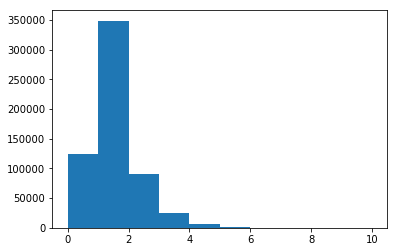

In [15]:
# i will assume if a minstay isn't included, it is 1 
paris['minstay'].fillna(1, inplace=True)

bedroom_vals = paris[np.isfinite(paris['bedrooms'])]
plt.hist(bedroom_vals.bedrooms)
plt.show()

# i feel good about imputing the mean value for missing bedrooms
paris['bedrooms'].fillna(int(paris['bedrooms'].mean()), inplace=True)


In [16]:
paris['bedrooms_per_person'] = paris['bedrooms'] / paris['accommodates']

paris[paris['accommodates'] == 0]

paris.info()

paris.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 596678 entries, 0 to 70157
Data columns (total 13 columns):
accommodates            596678 non-null int64
bedrooms                596678 non-null float64
date                    596678 non-null object
host_id                 596678 non-null int64
last_modified           596678 non-null datetime64[ns]
minstay                 596678 non-null float64
neighborhood            596678 non-null object
overall_satisfaction    596678 non-null float64
price                   596678 non-null float64
reviews                 596678 non-null int64
room_id                 596678 non-null int64
room_type               596678 non-null object
bedrooms_per_person     596678 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(4), object(3)
memory usage: 63.7+ MB


,accommodates,bedrooms,host_id,minstay,overall_satisfaction,price,reviews,room_id,bedrooms_per_person
count,596678.000000,596678.000000,5.966780e+05,596678.000000,596678.000000,596678.000000,596678.000000,5.966780e+05,596678.000000
mean,3.085552,1.067019,2.835253e+07,1.284731,2.670718,109.254365,14.083454,8.893860e+06,0.352387
std,1.500853,0.812218,2.897899e+07,1.460815,2.299306,119.728935,28.421108,5.430761e+06,0.239643
min,1.000000,0.000000,1.415000e+03,1.000000,0.000000,8.000000,0.000000,2.525000e+03,0.000000
25%,2.000000,1.000000,6.855991e+06,1.000000,0.000000,60.000000,0.000000,4.217281e+06,0.250000
50%,2.000000,1.000000,1.770822e+07,1.000000,4.500000,83.000000,4.000000,8.452109e+06,0.400000
75%,4.000000,1.000000,3.935284e+07,1.000000,4.500000,121.000000,14.000000,1.354392e+07,0.500000
max,16.000000,10.000000,1.432046e+08,695.000000,5.000000,11323.000000,529.000000,2.014408e+07,6.000000


I want to look at the change in reviews over time. I will examine the number of reviews from the May 26, 2016 to July 25, 2017. 

In [17]:
paris.date.unique()

array(['s3_files/paris/tomslee_airbnb_paris_0435_2016-05-26.csv',
       's3_files/paris/tomslee_airbnb_paris_0515_2016-08-10.csv',
       's3_files/paris/tomslee_airbnb_paris_0762_2017-01-01.csv',
       's3_files/paris/tomslee_airbnb_paris_0809_2017-01-19.csv',
       's3_files/paris/tomslee_airbnb_paris_0892_2017-02-18.csv',
       's3_files/paris/tomslee_airbnb_paris_1000_2017-03-28.csv',
       's3_files/paris/tomslee_airbnb_paris_1077_2017-04-16.csv',
       's3_files/paris/tomslee_airbnb_paris_1146_2017-04-25.csv',
       's3_files/paris/tomslee_airbnb_paris_1350_2017-06-16.csv',
       's3_files/paris/tomslee_airbnb_paris_1478_2017-07-25.csv'], dtype=object)

In [18]:
paris.loc[paris['date'] == 's3_files/paris/tomslee_airbnb_paris_0435_2016-05-26.csv', 'date'] = '2016-05-26'
paris.loc[paris['date'] == 's3_files/paris/tomslee_airbnb_paris_0515_2016-08-10.csv', 'date'] = '2016-08-10'
paris.loc[paris['date'] == 's3_files/paris/tomslee_airbnb_paris_0762_2017-01-01.csv', 'date'] = '2017-01-01'
paris.loc[paris['date'] == 's3_files/paris/tomslee_airbnb_paris_0809_2017-01-19.csv', 'date'] = '2017-01-19'
paris.loc[paris['date'] == 's3_files/paris/tomslee_airbnb_paris_0892_2017-02-18.csv', 'date'] = '2017-02-18'
paris.loc[paris['date'] == 's3_files/paris/tomslee_airbnb_paris_1000_2017-03-28.csv', 'date'] = '2017-03-28'
paris.loc[paris['date'] == 's3_files/paris/tomslee_airbnb_paris_1077_2017-04-16.csv', 'date'] = '2017-04-16'
paris.loc[paris['date'] == 's3_files/paris/tomslee_airbnb_paris_1146_2017-04-25.csv', 'date'] = '2017-04-25'
paris.loc[paris['date'] == 's3_files/paris/tomslee_airbnb_paris_1350_2017-06-16.csv', 'date'] = '2017-06-16'
paris.loc[paris['date'] == 's3_files/paris/tomslee_airbnb_paris_1478_2017-07-25.csv', 'date'] = '2017-07-25'



In [19]:

paris['date_time'] = pd.to_datetime(paris['date'])

In [20]:
rentals = paris.pivot(index='room_id', columns='date_time', values='reviews')

I am only interested in looking at rentals that have been on AirBnb for every data scrape; if rentals go on and off the site then we can't account for the time that they've been offline. 

In [21]:
rentals = rentals.dropna()

In [22]:
pct_change = pd.DataFrame()

In [23]:
# calculate compound monthly growth rate 

pct_change['diff'] = (rentals['2017-07-25 00:00:00'] / rentals['2016-05-26 00:00:00'])

In [24]:

pct_change['compound_monthly_growth'] = np.power(pct_change['diff'], 1/14) - 1 
pct_change['room_id'] = rentals.index.values



In [25]:
paris_may = pd.read_csv('s3_files/paris/tomslee_airbnb_paris_0435_2016-05-26.csv')
paris_jul = pd.read_csv('s3_files/paris/tomslee_airbnb_paris_1478_2017-07-25.csv')

In [26]:
# merge cmgr info with rental description info. 

paris_may.info()
paris_may['bedrooms_per_person'] = paris_may['bedrooms'] / paris_may['accommodates']
paris_jul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55951 entries, 0 to 55950
Data columns (total 14 columns):
room_id                 55951 non-null int64
host_id                 55951 non-null int64
room_type               55951 non-null object
borough                 0 non-null float64
neighborhood            55951 non-null object
reviews                 55951 non-null int64
overall_satisfaction    28182 non-null float64
accommodates            55951 non-null int64
bedrooms                55701 non-null float64
price                   55951 non-null float64
minstay                 54559 non-null float64
latitude                55951 non-null float64
longitude               55951 non-null float64
last_modified           55951 non-null object
dtypes: float64(7), int64(4), object(3)
memory usage: 6.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70158 entries, 0 to 70157
Data columns (total 21 columns):
room_id                 70158 non-null int64
survey_id               70158 no

In [27]:
paris_may = paris_may.drop(['borough', 'overall_satisfaction', 'price', 'minstay'], axis=1)
paris_jul = paris_jul[['room_id', 'price', 'reviews']]

In [28]:
paris_may = paris_may[np.isfinite(paris_may['bedrooms'])]
paris_may.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55701 entries, 0 to 55950
Data columns (total 11 columns):
room_id                55701 non-null int64
host_id                55701 non-null int64
room_type              55701 non-null object
neighborhood           55701 non-null object
reviews                55701 non-null int64
accommodates           55701 non-null int64
bedrooms               55701 non-null float64
latitude               55701 non-null float64
longitude              55701 non-null float64
last_modified          55701 non-null object
bedrooms_per_person    55701 non-null float64
dtypes: float64(4), int64(4), object(3)
memory usage: 5.1+ MB


In [29]:
paris_growth = paris_may.merge(pct_change)
paris_growth = paris_growth.merge(paris_jul, on='room_id')


In [30]:
neighborhoods = pd.read_csv('paris_quartier.csv')
neighborhoods = neighborhoods[['L_QU', 'C_AR']]
neighborhoods.columns = ['neighborhood', 'arrondissement']
paris_growth =  paris_growth.merge(neighborhoods)


In [31]:
paris_growth = paris_growth[['room_type', 'reviews_x', 'reviews_y', 'accommodates', 'bedrooms', 'arrondissement', 
                             'diff', 'compound_monthly_growth', 'price', 'bedrooms_per_person']]

paris_growth['rev_change'] = paris_growth['reviews_y'] - paris_growth['reviews_x']

In [32]:
paris_growth['log_price'] = np.log10(paris_growth.price)

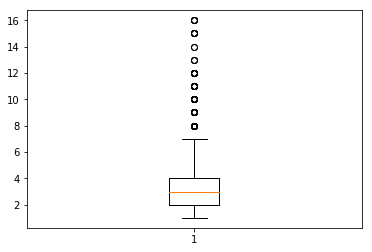

In [34]:
plt.boxplot(paris_growth.accommodates)
plt.show()

paris_growth = paris_growth[paris_growth['accommodates'] < 7]

In [35]:
# examine rentals with a change in number of reviews over time. 

nc = paris_growth[paris_growth['rev_change'] == 0]
change = paris_growth[paris_growth['rev_change'] > 0]

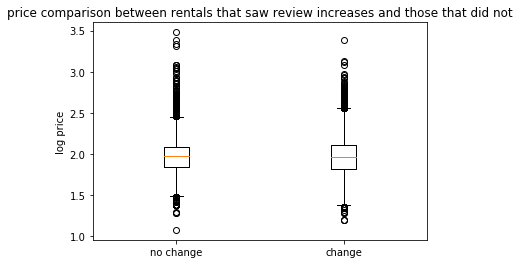

In [36]:
plt.boxplot([nc.log_price, change.log_price])
plt.xticks([1,2], ['no change', 'change'])
plt.ylabel('log price')
plt.title('price comparison between rentals that saw review increases and those that did not')
plt.show()

In [37]:
# i am going to compare many different linear models 
# i am going to build a function to expedite this process

import statsmodels.api as sm
from statsmodels.formula.api import ols

# build a linear model to compare prices of rentals that saw a change in reviews vs those that did not 
def linear_model(df1, df2):
    # linear model 1 
    X_sm = df1[['room_type', 'accommodates', 'bedrooms', 'arrondissement']]
    X_sm = pd.get_dummies(X_sm, columns =['room_type', 'arrondissement'])
    X_sm = X_sm.drop(['arrondissement_20', 'room_type_Entire home/apt'], axis=1)
    X_sm = sm.add_constant(X_sm)
    y_sm = df1['log_price']
    lm_sm = sm.OLS(y_sm, X_sm).fit()

    
    # linear model 2 
    X_lg = df2[['room_type','accommodates', 'bedrooms', 'arrondissement']]
    X_lg = pd.get_dummies(X_lg, columns =['room_type', 'arrondissement'])
    X_lg = X_lg.drop(['arrondissement_20', 'room_type_Entire home/apt'], axis=1)
    X_lg = sm.add_constant(X_lg)
    y_lg = df2['log_price']
    lm_lg = sm.OLS(y_lg, X_lg).fit()
    
    print(lm_sm.summary())
    print(lm_lg.summary())
    
    return [X_sm, lm_sm, X_lg, lm_lg]
    
    

/Users/sarahjordan/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [38]:
X_nc, lm_nc, X_c, lm_c = linear_model(nc, change)



                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     263.8
Date:                Tue, 27 Mar 2018   Prob (F-statistic):               0.00
Time:                        19:31:02   Log-Likelihood:                 2607.2
No. Observations:                7589   AIC:                            -5166.
Df Residuals:                    7565   BIC:                            -5000.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

In [39]:
# create a function that will calculate z-score
def z_score(B1, B2, se1, se2):
    numerator = B1 - B2
    inner_denom = np.abs(np.power(se1,2) - np.power(se2, 2))
    denominator = np.power(inner_denom, 0.5)
    zscore = numerator / denominator
    return zscore


# create a funciton that will compare all coefficients 
def compare_coefficients(X1, lm1, X2, lm2):
    coef_sm = []
    for i in lm1.params:
        coef_sm.append(i)

    se_sm = []
    for i in lm1.bse:
        se_sm.append(i)
    
       
    sm_df = pd.DataFrame()
    sm_df['variable'] = X1.columns
    sm_df['coef_sm'] = coef_sm

    sm_df['se_sm'] = se_sm


    coef_lg = []
    for i in lm2.params:
        coef_lg.append(i)

    se_lg = []
    for i in lm2.bse:
        se_lg.append(i)
    
       
    lg_df = pd.DataFrame()
    lg_df['variable'] = X2.columns
    lg_df['coef_lg'] = coef_lg
    lg_df['se_lg'] = se_lg



    df = sm_df.merge(lg_df)
    df['z_score'] = z_score(df.coef_sm, df.coef_lg, df.se_sm, df.se_lg)
    return df   
    

In [40]:
c_nc_df = compare_coefficients(X_nc, lm_nc, X_c, lm_c)

In [41]:
# compare cofficients - rentals that had a change in their number of reviews vs those that did not
c_nc_df

,variable,coef_sm,se_sm,coef_lg,se_lg,z_score
0,const,1.669685,0.008959,1.589220,0.006739,13.631157
1,accommodates,0.045813,0.002210,0.046583,0.001378,-0.445918
2,bedrooms,0.101140,0.003525,0.114501,0.002320,-5.034311
3,room_type_Private room,-0.134140,0.006503,-0.144196,0.004576,2.176182
4,room_type_Shared room,-0.146500,0.027781,-0.344949,0.016426,8.857357
5,arrondissement_1,0.282095,0.018715,0.276034,0.009528,0.376302
6,arrondissement_2,0.190614,0.016018,0.192658,0.008512,-0.150587
7,arrondissement_3,0.209551,0.014441,0.224308,0.007750,-1.210975
8,arrondissement_4,0.232896,0.016019,0.262247,0.007926,-2.108377
9,arrondissement_5,0.166096,0.014557,0.195793,0.008421,-2.501177


In [42]:
def split_data(df, column, threshold):
    df1 = df[df[column] <= threshold]
    df2 = df[df[column] >= threshold]
    return df1, df2 

pct_50, pct_50plus = split_data(paris_growth, 'rev_change', np.percentile(paris_growth.rev_change, 50))
X_50, lm_50, X_50p, lm_50p = linear_model(pct_50,pct_50plus)




                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     430.7
Date:                Tue, 27 Mar 2018   Prob (F-statistic):               0.00
Time:                        19:31:06   Log-Likelihood:                 3852.6
No. Observations:               10634   AIC:                            -7657.
Df Residuals:                   10610   BIC:                            -7483.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

In [43]:
ab_50_df = compare_coefficients(X_50, lm_50, X_50p, lm_50p)
ab_50_df

,variable,coef_sm,se_sm,coef_lg,se_lg,z_score
0,const,1.646083,0.007492,1.591206,0.007448,67.678602
1,accommodates,0.047149,0.001825,0.046188,0.001477,0.897960
2,bedrooms,0.104253,0.002923,0.114031,0.002519,-6.595404
3,room_type_Private room,-0.133895,0.005526,-0.143803,0.004927,3.960410
4,room_type_Shared room,-0.175384,0.024518,-0.344068,0.016948,9.521139
5,arrondissement_1,0.304414,0.014940,0.262132,0.010153,3.858088
6,arrondissement_2,0.189075,0.012912,0.190795,0.009092,-0.187544
7,arrondissement_3,0.228133,0.010959,0.215520,0.008426,1.800128
8,arrondissement_4,0.243577,0.012152,0.260188,0.008544,-1.922257
9,arrondissement_5,0.183566,0.011694,0.187064,0.009078,-0.474445


In [44]:
# look at 75th percentile 
pct_75, pct_75plus = split_data(paris_growth, 'rev_change', np.percentile(paris_growth.rev_change, 75))
X_75, lm_75, X_75p, lm_75p = linear_model(pct_75,pct_75plus)
ab_75_df = compare_coefficients(X_75, lm_75, X_75p, lm_75p)
ab_75_df



                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     752.3
Date:                Tue, 27 Mar 2018   Prob (F-statistic):               0.00
Time:                        19:31:09   Log-Likelihood:                 6321.3
No. Observations:               15923   AIC:                        -1.259e+04
Df Residuals:                   15899   BIC:                        -1.241e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

,variable,coef_sm,se_sm,coef_lg,se_lg,z_score
0,const,1.628610,0.006039,1.595556,0.011944,3.207850
1,accommodates,0.047234,0.001426,0.044909,0.002009,1.642018
2,bedrooms,0.108370,0.002315,0.103496,0.003619,1.752125
3,room_type_Private room,-0.139256,0.004505,-0.134923,0.006594,-0.899819
4,room_type_Shared room,-0.217964,0.019884,-0.349486,0.019198,25.391115
5,arrondissement_1,0.297783,0.011010,0.246161,0.014371,5.589529
6,arrondissement_2,0.195037,0.009391,0.185334,0.013343,1.023740
7,arrondissement_3,0.226413,0.008122,0.197867,0.012819,2.878210
8,arrondissement_4,0.258046,0.008809,0.247589,0.012735,1.137064
9,arrondissement_5,0.177713,0.008636,0.196228,0.013847,-1.710493


In [45]:
# look at 95th percentile

pct_95, pct_95plus = split_data(paris_growth, 'rev_change', np.percentile(paris_growth.rev_change, 95))
X_95, lm_95, X_95p, lm_95p = linear_model(pct_95,pct_95plus)
ab_95_df = compare_coefficients(X_95, lm_95, X_95p, lm_95p)
ab_95_df

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     951.7
Date:                Tue, 27 Mar 2018   Prob (F-statistic):               0.00
Time:                        19:31:34   Log-Likelihood:                 8354.5
No. Observations:               20027   AIC:                        -1.666e+04
Df Residuals:                   20003   BIC:                        -1.647e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

,variable,coef_sm,se_sm,coef_lg,se_lg,z_score
0,const,1.627749,0.005492,1.602754,0.025787,0.992054
1,accommodates,0.045320,0.001225,0.044596,0.004371,0.172414
2,bedrooms,0.110812,0.002022,0.076446,0.008388,4.221525
3,room_type_Private room,-0.139808,0.003921,-0.125141,0.013651,-1.121704
4,room_type_Shared room,-0.284114,0.015319,-0.258538,0.039116,-0.710609
5,arrondissement_1,0.270862,0.008886,0.213764,0.029811,2.006554
6,arrondissement_2,0.179950,0.007812,0.180857,0.027362,-0.034572
7,arrondissement_3,0.208299,0.006910,0.185404,0.027548,0.858549
8,arrondissement_4,0.243479,0.007217,0.224429,0.026992,0.732419
9,arrondissement_5,0.176722,0.007437,0.170143,0.031048,0.218255


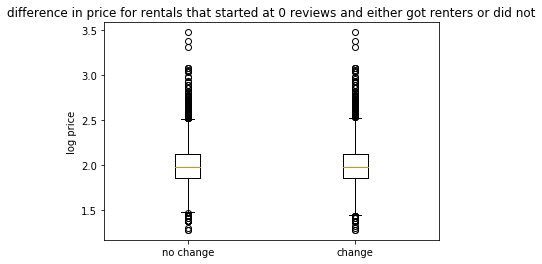

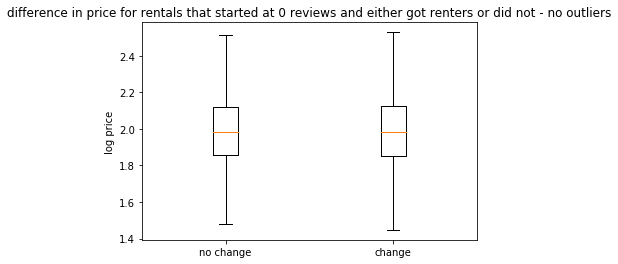

In [46]:
# before looking at compound monthly growth rate, first look at rentals that started with 0 reviews and didn't change
# compare with those that started at 0 and ended up with rentals 

norev_start = paris_growth[paris_growth['reviews_x'] == 0]

nc_0, c_0 = split_data(norev_start, 'rev_change', 0)

plt.boxplot([nc_0.log_price, c_0.log_price])
plt.xticks([1,2], ['no change', 'change'])
plt.ylabel('log price')
plt.title('difference in price for rentals that started at 0 reviews and either got renters or did not')
plt.show()


plt.boxplot([nc_0.log_price, c_0.log_price], showfliers=False)
plt.xticks([1,2], ['no change', 'change'])
plt.ylabel('log price')
plt.title('difference in price for rentals that started at 0 reviews and either got renters or did not - no outliers')
plt.show()



In [47]:
# compare linear model

X_nc, lm_nc, X_c, lm_c = linear_model(nc_0,c_0)
cnc_df = compare_coefficients(X_nc, lm_nc, X_c, lm_c)
cnc_df

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     182.0
Date:                Tue, 27 Mar 2018   Prob (F-statistic):               0.00
Time:                        19:31:50   Log-Likelihood:                 1811.5
No. Observations:                5625   AIC:                            -3575.
Df Residuals:                    5601   BIC:                            -3416.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

,variable,coef_sm,se_sm,coef_lg,se_lg,z_score
0,const,1.681747,0.010448,1.670227,0.009482,2.624694
1,accommodates,0.047816,0.002636,0.046624,0.002327,0.962399
2,bedrooms,0.095791,0.004126,0.099731,0.003668,-2.085809
3,room_type_Private room,-0.119799,0.007701,-0.124104,0.006978,1.321830
4,room_type_Shared room,-0.134187,0.029635,-0.166585,0.026487,2.437624
5,arrondissement_1,0.277435,0.022715,0.258483,0.019324,1.587371
6,arrondissement_2,0.190906,0.019831,0.191354,0.016285,-0.039610
7,arrondissement_3,0.194068,0.017372,0.190644,0.014186,0.341512
8,arrondissement_4,0.233547,0.019257,0.252142,0.015720,-1.671849
9,arrondissement_5,0.167953,0.017973,0.154709,0.015058,1.349494


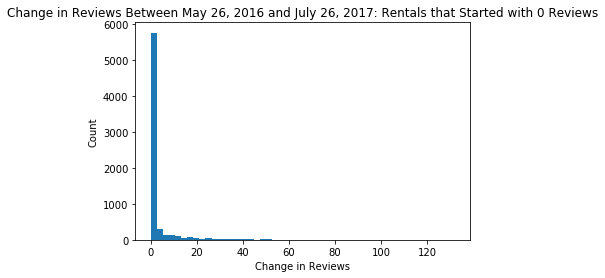

In [48]:
plt.hist(norev_start.rev_change, bins=50)
plt.xlabel('Change in Reviews')
plt.ylabel('Count')
plt.title('Change in Reviews Between May 26, 2016 and July 26, 2017: Rentals that Started with 0 Reviews')
plt.show()

Looks like the vast majority of rentals that started with 0 reviews ended up with 0 reviews. 

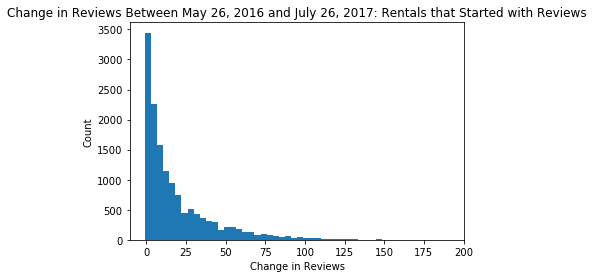

In [49]:
# look at this hist for rentals that start with reviews 
rev_start = paris_growth[paris_growth['reviews_x'] > 0]


plt.hist(rev_start.rev_change, bins=50)
plt.xlabel('Change in Reviews')
plt.ylabel('Count')
plt.title('Change in Reviews Between May 26, 2016 and July 26, 2017: Rentals that Started with Reviews')
plt.show()

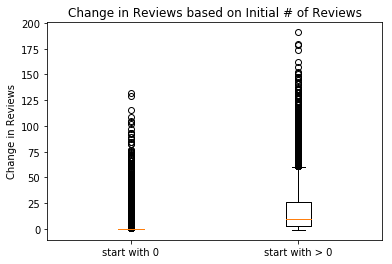

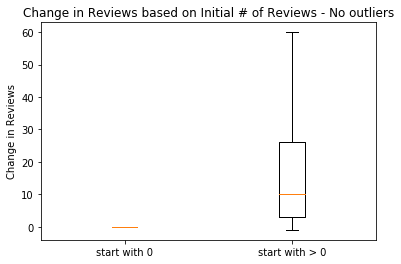

In [50]:
plt.boxplot([norev_start.rev_change, rev_start.rev_change])
plt.xticks([1,2], ['start with 0', 'start with > 0'])
plt.ylabel('Change in Reviews')
plt.title('Change in Reviews based on Initial # of Reviews')
plt.show()

plt.boxplot([norev_start.rev_change, rev_start.rev_change], showfliers=False)
plt.xticks([1,2], ['start with 0', 'start with > 0'])
plt.ylabel('Change in Reviews')
plt.title('Change in Reviews based on Initial # of Reviews - No outliers')
plt.show()

$H_0$ : $\mu_{notreviewed}$ = $\mu_{reviewed}$ 

In [51]:
# test for statistical significance 

import numpy as np 
from scipy import stats

# One-way ANOVA

f, p = stats.f_oneway(norev_start.rev_change, rev_start.rev_change)


print('One-way ANOVA')
print('----------------')
print('F value:', f)
print('P value', p)

One-way ANOVA
----------------
F value: 2957.72235913
P value 0.0


In [52]:
# paris_growth = paris_growth[paris_growth['compound_monthly_growth'] >= 0]
paris_growth

,room_type,reviews_x,reviews_y,accommodates,bedrooms,arrondissement,diff,compound_monthly_growth,price,bedrooms_per_person,rev_change,log_price
0,Entire home/apt,0,0,4,2.0,17,NaN,NaN,194.0,0.500000,0,2.287802
1,Entire home/apt,0,0,2,0.0,17,NaN,NaN,78.0,0.000000,0,1.892095
2,Entire home/apt,40,90,6,2.0,17,2.250000,0.059634,78.0,0.333333,50,1.892095
3,Entire home/apt,33,46,4,2.0,17,1.393939,0.024007,144.0,0.500000,13,2.158362
4,Entire home/apt,0,0,2,1.0,17,NaN,NaN,59.0,0.500000,0,1.770852
6,Private room,4,5,2,1.0,17,1.250000,0.016067,36.0,0.500000,1,1.556303
7,Entire home/apt,3,3,4,1.0,17,1.000000,0.000000,82.0,0.250000,0,1.913814
8,Entire home/apt,0,0,4,2.0,17,NaN,NaN,96.0,0.500000,0,1.982271
9,Entire home/apt,7,18,2,1.0,17,2.571429,0.069789,84.0,0.500000,11,1.924279
10,Entire home/apt,0,0,4,1.0,17,NaN,NaN,84.0,0.250000,0,1.924279


In [53]:
paris_growth['cmg_pct'] = paris_growth['compound_monthly_growth'] * 100

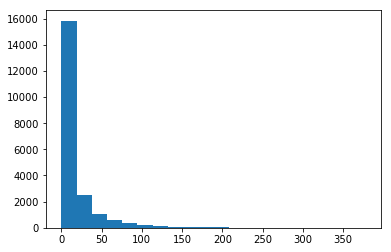

In [54]:
# now it is time to look at compound monthly growth rates. 
# i need to bin my data into groups based on starting # of reviews 

plt.hist(paris_growth.reviews_x, bins=20)
plt.show()

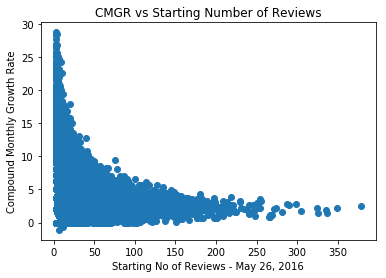

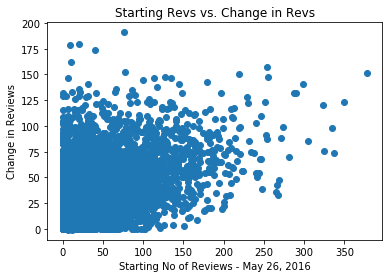

In [55]:
plt.scatter(paris_growth.reviews_x, paris_growth.cmg_pct)
plt.xlabel('Starting No of Reviews - May 26, 2016')
plt.ylabel('Compound Monthly Growth Rate')
plt.title('CMGR vs Starting Number of Reviews')
plt.show()

plt.scatter(paris_growth.reviews_x, paris_growth.rev_change)
plt.xlabel('Starting No of Reviews - May 26, 2016')
plt.ylabel('Change in Reviews')
plt.title('Starting Revs vs. Change in Revs')
plt.show()


We can see that rentals with a low number of reviews have a greater range of compound monthly growth rates. this makes sense, since a small numerical change in the number of reviews will result in a large CMGR. 

We can also see that rentals with a high starting number of reviews tend to have higher change in reviews, but this is not a strong relationship; some rentals with a low number of reviews quickly gain a high number of reviews. We should explore these rentals that see a big change in the # of reviews and those that have a big change in their compound monthly growth rate. 

In [56]:
# bin data based on compound monthly growth rate 
# get rid of infinite values 
paris_swr = paris_growth[paris_growth['reviews_x'] > 0]
np.percentile(paris_swr.cmg_pct, 90)


10.408951367381224

In [57]:
# compare prices of rentals with cmgr above and below the 90th percentile 

cmgr_90, cmgr_90p = split_data(paris_swr, 'cmg_pct', np.percentile(paris_swr.cmg_pct, 90))
X_cmgr90, lm_cmgr90, X_cmgr90p, lm_cmgr90p = linear_model(cmgr_90, cmgr_90p)
cmgr90_df = compare_coefficients(X_cmgr90, lm_cmgr90, X_cmgr90p, lm_cmgr90p)
cmgr90_df

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     733.8
Date:                Tue, 27 Mar 2018   Prob (F-statistic):               0.00
Time:                        19:32:03   Log-Likelihood:                 6138.9
No. Observations:               12831   AIC:                        -1.223e+04
Df Residuals:                   12807   BIC:                        -1.205e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

,variable,coef_sm,se_sm,coef_lg,se_lg,z_score
0,const,1.593182,0.006811,1.621165,0.022215,-1.323403
1,accommodates,0.045910,0.001429,0.043055,0.004029,0.757762
2,bedrooms,0.115271,0.002412,0.114887,0.007110,0.057282
3,room_type_Private room,-0.149340,0.004660,-0.153238,0.013556,0.306205
4,room_type_Shared room,-0.339193,0.018084,-0.449236,0.048432,2.449261
5,arrondissement_1,0.281797,0.010001,0.256030,0.027563,1.003204
6,arrondissement_2,0.191047,0.008900,0.162884,0.025448,1.181275
7,arrondissement_3,0.229434,0.008045,0.173151,0.024481,2.434257
8,arrondissement_4,0.257221,0.008235,0.220225,0.024759,1.584498
9,arrondissement_5,0.196913,0.008657,0.172091,0.027234,0.961274


There are no significant differences in coefficients here; likely because mainly rentals with a low number of reviews have high cmgr. 

In [58]:
paris_high = paris_swr[paris_swr['cmg_pct'] > 20]

In [59]:
paris_high.describe()

,reviews_x,reviews_y,accommodates,bedrooms,arrondissement,diff,compound_monthly_growth,price,bedrooms_per_person,rev_change,log_price,cmg_pct
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000
mean,4.070000,72.430000,2.940000,0.850000,10.860000,18.141675,0.227513,93.47000,0.285500,68.360000,1.913957,22.751270
std,1.512607,28.803849,1.324364,0.715979,5.973037,4.847948,0.021164,56.84401,0.234839,27.633796,0.214127,2.116447
min,3.000000,40.000000,1.000000,0.000000,1.000000,13.000000,0.201067,23.00000,0.000000,37.000000,1.361728,20.106741
25%,3.000000,51.750000,2.000000,0.000000,5.000000,14.285714,0.209184,59.00000,0.000000,48.000000,1.770852,20.918434
50%,3.000000,64.000000,2.000000,1.000000,11.000000,16.690476,0.222698,82.00000,0.291667,60.000000,1.913814,22.269790
75%,5.000000,84.250000,4.000000,1.000000,17.000000,20.375000,0.240243,110.25000,0.500000,80.250000,2.042375,24.024302
max,10.000000,188.000000,6.000000,3.000000,20.000000,34.333333,0.287342,386.00000,1.000000,179.000000,2.586587,28.734218


Places with cmgr greater than 20% range from having 3 to 10 reviews at the start, and their CMGRs range from 20.1% to 28.7%. Price per night ranges from \$23 to \$110 per night. This is interesting, because we would expect places with 1-2 reviews to have high compound monthly growth rates, since if they get just a few reviews each month we would  see fairly high percent increase in rentals. Let's look at rentals with 1 and 2 reviews at the start of this period. 

In [60]:
paris1 = paris_swr[paris_swr['reviews_x'] == 1]
paris2 = paris_swr[paris_swr['reviews_x'] == 2]

paris_swr.describe()

,reviews_x,reviews_y,accommodates,bedrooms,arrondissement,diff,compound_monthly_growth,price,bedrooms_per_person,rev_change,log_price,cmg_pct
count,14155.000000,14155.000000,14155.000000,14155.000000,14155.000000,14155.000000,14155.000000,14155.000000,14155.000000,14155.000000,14155.000000,14155.000000
mean,24.694030,43.202826,3.073119,1.055528,11.201625,2.236269,0.045048,110.619640,0.351223,18.508795,1.977388,4.504779
std,33.363446,50.071821,1.283016,0.722103,5.703650,2.091858,0.042305,78.553731,0.221680,22.814591,0.227624,4.230473
min,3.000000,3.000000,1.000000,0.000000,1.000000,0.857143,-0.010950,12.000000,0.000000,-1.000000,1.079181,-1.095037
25%,6.000000,11.000000,2.000000,1.000000,6.000000,1.235294,0.015208,66.000000,0.250000,3.000000,1.819544,1.520799
50%,12.000000,25.000000,3.000000,1.000000,11.000000,1.604651,0.034356,91.000000,0.333333,10.000000,1.959041,3.435602
75%,28.000000,55.000000,4.000000,1.000000,17.000000,2.363636,0.063370,127.000000,0.500000,26.000000,2.103804,6.336983
max,378.000000,529.000000,6.000000,5.000000,20.000000,34.333333,0.287342,2414.000000,1.500000,191.000000,3.382737,28.734218


This is because no rentals in this sample started with 1 or 2 reviews. Good to know. 

In [61]:
# look at 25th pctile

cmgr_25, cmgr_25p = split_data(paris_swr, 'cmg_pct', np.percentile(paris_swr.cmg_pct, 25))
X_cmgr25, lm_cmgr25, X_cmgr25p, lm_cmgr25p = linear_model(cmgr_25, cmgr_25p)
cmgr25_df = compare_coefficients(X_cmgr25, lm_cmgr25, X_cmgr25p, lm_cmgr25p)
cmgr25_df

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     185.7
Date:                Tue, 27 Mar 2018   Prob (F-statistic):               0.00
Time:                        19:32:27   Log-Likelihood:                 1662.4
No. Observations:                3541   AIC:                            -3277.
Df Residuals:                    3517   BIC:                            -3129.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

,variable,coef_sm,se_sm,coef_lg,se_lg,z_score
0,const,1.617906,0.012421,1.585639,0.007664,3.301026
1,accommodates,0.041437,0.002811,0.047165,0.001541,-2.436794
2,bedrooms,0.119621,0.004869,0.113694,0.002589,1.437310
3,room_type_Private room,-0.157878,0.008543,-0.146703,0.005171,-1.643553
4,room_type_Shared room,-0.339314,0.048373,-0.350385,0.018042,0.246671
5,arrondissement_1,0.292912,0.022853,0.280067,0.010443,0.631883
6,arrondissement_2,0.200491,0.018694,0.188747,0.009486,0.729028
7,arrondissement_3,0.257927,0.016439,0.219507,0.008727,2.757852
8,arrondissement_4,0.264154,0.017429,0.254821,0.008867,0.622023
9,arrondissement_5,0.217292,0.017370,0.192940,0.009449,1.670804


In [62]:

cmgr_50, cmgr_50p = split_data(paris_swr, 'cmg_pct', np.percentile(paris_swr.cmg_pct, 50))
X_cmgr50, lm_cmgr50, X_cmgr50p, lm_cmgr50p = linear_model(cmgr_50, cmgr_50p)
cmgr50_df = compare_coefficients(X_cmgr50, lm_cmgr50, X_cmgr50p, lm_cmgr50p)
cmgr50_df


                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     391.3
Date:                Tue, 27 Mar 2018   Prob (F-statistic):               0.00
Time:                        19:32:36   Log-Likelihood:                 3364.5
No. Observations:                7080   AIC:                            -6681.
Df Residuals:                    7056   BIC:                            -6516.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

,variable,coef_sm,se_sm,coef_lg,se_lg,z_score
0,const,1.600209,0.009022,1.589255,0.009424,4.024199
1,accommodates,0.046420,0.001943,0.045019,0.001883,2.928126
2,bedrooms,0.114097,0.003328,0.115927,0.003159,-1.746030
3,room_type_Private room,-0.148354,0.006236,-0.150686,0.006274,3.379262
4,room_type_Shared room,-0.324452,0.029815,-0.360904,0.020517,1.685036
5,arrondissement_1,0.293399,0.014273,0.271926,0.012564,3.170223
6,arrondissement_2,0.184635,0.012550,0.193801,0.011387,-1.737585
7,arrondissement_3,0.241367,0.010984,0.211073,0.010676,11.729180
8,arrondissement_4,0.229954,0.011450,0.273743,0.010773,-11.287763
9,arrondissement_5,0.195436,0.011696,0.196947,0.011665,-1.775275


In [63]:
# look at those with very high cmgrs 

cmgr_95, cmgr_95p = split_data(paris_swr, 'cmg_pct', np.percentile(paris_swr.cmg_pct, 95))
X_cmgr95, lm_cmgr95, X_cmgr95p, lm_cmgr95p = linear_model(cmgr_95, cmgr_95p)
cmgr95_df = compare_coefficients(X_cmgr95, lm_cmgr95, X_cmgr95p, lm_cmgr95p)
cmgr95_df

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     771.1
Date:                Tue, 27 Mar 2018   Prob (F-statistic):               0.00
Time:                        19:32:37   Log-Likelihood:                 6451.3
No. Observations:               13464   AIC:                        -1.285e+04
Df Residuals:                   13440   BIC:                        -1.267e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

,variable,coef_sm,se_sm,coef_lg,se_lg,z_score
0,const,1.595466,0.006655,1.612948,0.032712,-0.545848
1,accommodates,0.045096,0.001390,0.047557,0.005581,-0.455192
2,bedrooms,0.116498,0.002352,0.094947,0.010028,2.210665
3,room_type_Private room,-0.149866,0.004548,-0.143980,0.019222,-0.315151
4,room_type_Shared room,-0.345522,0.017565,-0.462801,0.064619,1.885950
5,arrondissement_1,0.279161,0.009699,0.269606,0.039457,0.249835
6,arrondissement_2,0.189115,0.008668,0.176096,0.035873,0.373992
7,arrondissement_3,0.227323,0.007843,0.168898,0.035397,1.692654
8,arrondissement_4,0.254225,0.008042,0.233684,0.035087,0.601440
9,arrondissement_5,0.195243,0.008461,0.185966,0.038537,0.246761


In [64]:
# see if there are large differences between rentals with a cmgr in the 95th percentile and those in the bottom 50% 

X_cmgr50b, lm_cmgr50b, X_cmgr95p, lm_cmgr95p = linear_model(cmgr_50, cmgr_95p)
hilo_df = compare_coefficients(X_cmgr50b, lm_cmgr50b, X_cmgr95p, lm_cmgr95p)
hilo_df

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     391.3
Date:                Tue, 27 Mar 2018   Prob (F-statistic):               0.00
Time:                        19:32:38   Log-Likelihood:                 3364.5
No. Observations:                7080   AIC:                            -6681.
Df Residuals:                    7056   BIC:                            -6516.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

,variable,coef_sm,se_sm,coef_lg,se_lg,z_score
0,const,1.600209,0.009022,1.612948,0.032712,-0.405144
1,accommodates,0.046420,0.001943,0.047557,0.005581,-0.217207
2,bedrooms,0.114097,0.003328,0.094947,0.010028,2.024341
3,room_type_Private room,-0.148354,0.006236,-0.143980,0.019222,-0.240575
4,room_type_Shared room,-0.324452,0.029815,-0.462801,0.064619,2.413230
5,arrondissement_1,0.293399,0.014273,0.269606,0.039457,0.646823
6,arrondissement_2,0.184635,0.012550,0.176096,0.035873,0.254091
7,arrondissement_3,0.241367,0.010984,0.168898,0.035397,2.153623
8,arrondissement_4,0.229954,0.011450,0.233684,0.035087,-0.112464
9,arrondissement_5,0.195436,0.011696,0.185966,0.038537,0.257928


In [65]:
print(paris_growth.describe())
np.percentile(paris_growth.reviews_x, 95)

          reviews_x     reviews_y  accommodates      bedrooms  arrondissement  \
count  21041.000000  21041.000000  21041.000000  21041.000000    21041.000000   
mean      16.612518     30.010788      3.043201      1.063638       11.824390   
std       29.716610     45.564736      1.270792      0.732845        5.612249   
min        0.000000      0.000000      1.000000      0.000000        1.000000   
25%        0.000000      0.000000      2.000000      1.000000        7.000000   
50%        6.000000     13.000000      3.000000      1.000000       12.000000   
75%       18.000000     38.000000      4.000000      1.000000       17.000000   
max      378.000000    529.000000      6.000000      5.000000       20.000000   

               diff  compound_monthly_growth         price  \
count  1.541600e+04             1.541600e+04  21041.000000   
mean            inf                      inf    112.652726   
std             NaN                      NaN     85.792606   
min    8.571429e-01   

75.0

In [88]:
cmgr_50, cmgr_50p = split_data(paris_swr, 'reviews_x', np.percentile(paris_swr.reviews_x, 50))
X_cmgr50, lm_cmgr50, X_cmgr50p, lm_cmgr50p = linear_model(cmgr_50, cmgr_50p)
cmgr50_df = compare_coefficients(X_cmgr50, lm_cmgr50, X_cmgr50p, lm_cmgr50p)
cmgr50_df

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     442.4
Date:                Tue, 27 Mar 2018   Prob (F-statistic):               0.00
Time:                        19:42:41   Log-Likelihood:                 3347.3
No. Observations:                7288   AIC:                            -6647.
Df Residuals:                    7264   BIC:                            -6481.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

,variable,coef_sm,se_sm,coef_lg,se_lg,z_score
0,const,1.593673,0.008908,1.595832,0.009350,-0.760257
1,accommodates,0.045723,0.001973,0.045180,0.001807,0.685270
2,bedrooms,0.118793,0.003198,0.112780,0.003203,33.935284
3,room_type_Private room,-0.159817,0.006441,-0.140328,0.005954,-7.925087
4,room_type_Shared room,-0.381260,0.030180,-0.341281,0.020108,-1.776438
5,arrondissement_1,0.312103,0.014008,0.255480,0.012621,9.316635
6,arrondissement_2,0.201203,0.012707,0.179776,0.011223,3.595936
7,arrondissement_3,0.231377,0.011217,0.221225,0.010449,2.487987
8,arrondissement_4,0.262832,0.011626,0.249249,0.010622,2.873573
9,arrondissement_5,0.196172,0.011752,0.200044,0.011398,-1.351969


In [66]:
# bin data by starting no of reviews 
# alreay looked at those starting with 0 revs 
paris_growth['avg_revchange'] = paris_growth['rev_change'] / 14
paris0 = paris_growth[paris_growth['reviews_x'] == 0]
paris25 = paris_growth[(paris_growth['reviews_x'] >= 1) & (paris_growth['reviews_x'] <= 5)]
paris50 = paris_growth[(paris_growth['reviews_x'] >= 6) & (paris_growth['reviews_x'] <= 12)]
paris75 = paris_growth[(paris_growth['reviews_x'] >= 13) & (paris_growth['reviews_x'] <= 29)]
paris95 = paris_growth[(paris_growth['reviews_x'] >= 30) & (paris_growth['reviews_x'] <= 95)]
paris100 = paris_growth[(paris_growth['reviews_x'] >= 96)]



In [67]:
paris25.describe()

,reviews_x,reviews_y,accommodates,bedrooms,arrondissement,diff,compound_monthly_growth,price,bedrooms_per_person,rev_change,log_price,cmg_pct,avg_revchange
count,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000
mean,3.859064,11.549123,3.109942,1.081287,12.111404,3.047656,0.057532,110.508480,0.350531,7.690058,1.967799,5.753202,0.549290
std,0.810517,12.605852,1.278739,0.750821,5.539260,3.424078,0.058996,88.121434,0.220950,12.537997,0.239837,5.899593,0.895571
min,3.000000,3.000000,1.000000,0.000000,1.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.079181,0.000000,0.000000
25%,3.000000,4.000000,2.000000,1.000000,8.000000,1.000000,0.000000,63.000000,0.250000,0.000000,1.799341,0.000000,0.000000
50%,4.000000,7.000000,3.000000,1.000000,12.000000,1.750000,0.040782,90.000000,0.333333,3.000000,1.954243,4.078221,0.214286
75%,5.000000,13.000000,4.000000,1.000000,17.000000,3.500000,0.093609,121.000000,0.500000,9.000000,2.082785,9.360882,0.642857
max,5.000000,133.000000,6.000000,5.000000,20.000000,34.333333,0.287342,2150.000000,1.500000,129.000000,3.332438,28.734218,9.214286


2,498 rentals started with 1-5 reviews. They ended up with 4-133 rentals at the end of 14 months. The compound monthly growht rates range from 1.3% to 28.73%. Prices range from \$22 per night to \$1298 per night. 

In [68]:
paris50.describe()

,reviews_x,reviews_y,accommodates,bedrooms,arrondissement,diff,compound_monthly_growth,price,bedrooms_per_person,rev_change,log_price,cmg_pct,avg_revchange
count,3868.000000,3868.000000,3868.000000,3868.000000,3868.000000,3868.000000,3868.000000,3868.000000,3868.000000,3868.000000,3868.000000,3868.000000,3868.000000
mean,8.581179,19.591779,3.077559,1.088159,11.724664,2.312823,0.048044,112.950620,0.356498,11.010600,1.980964,4.804426,0.786471
std,1.980348,15.430353,1.287558,0.760231,5.532044,1.859192,0.043497,87.697513,0.220857,15.112102,0.234052,4.349704,1.079436
min,6.000000,6.000000,1.000000,0.000000,1.000000,0.857143,-0.010950,19.000000,0.000000,-1.000000,1.278754,-1.095037,-0.071429
25%,7.000000,10.000000,2.000000,1.000000,7.000000,1.181818,0.012004,66.000000,0.250000,2.000000,1.819544,1.200391,0.142857
50%,8.000000,15.000000,3.000000,1.000000,11.000000,1.666667,0.037161,91.000000,0.400000,6.000000,1.959041,3.716139,0.428571
75%,10.000000,23.000000,4.000000,1.000000,17.000000,2.666667,0.072572,129.000000,0.500000,14.000000,2.110590,7.257171,1.000000
max,12.000000,188.000000,6.000000,5.000000,20.000000,22.000000,0.247060,2414.000000,1.500000,179.000000,3.382737,24.705996,12.785714


3,322 rentals started with 5-12 reviews. They ended up wtih 7-188 rentals. CMGRs range from 0.5% to 24.7%. Prices range from \$19 to \$2414 per night. 

In [69]:
paris75.describe()

,reviews_x,reviews_y,accommodates,bedrooms,arrondissement,diff,compound_monthly_growth,price,bedrooms_per_person,rev_change,log_price,cmg_pct,avg_revchange
count,3450.000000,3450.000000,3450.000000,3450.000000,3450.000000,3450.000000,3450.000000,3450.000000,3450.000000,3450.000000,3450.000000,3450.000000,3450.000000
mean,19.548116,37.820290,3.082319,1.065797,11.019420,1.956417,0.041815,112.186087,0.355121,18.272174,1.986648,4.181466,1.305155
std,4.825290,20.795603,1.299087,0.717196,5.714065,1.049430,0.032452,72.576932,0.223549,19.546833,0.224374,3.245162,1.396202
min,13.000000,13.000000,1.000000,0.000000,1.000000,1.000000,0.000000,16.000000,0.000000,0.000000,1.204120,0.000000,0.000000
25%,15.000000,23.000000,2.000000,1.000000,6.000000,1.260870,0.016695,70.000000,0.250000,5.000000,1.845098,1.669509,0.357143
50%,19.000000,32.000000,3.000000,1.000000,11.000000,1.629630,0.035498,95.000000,0.400000,12.000000,1.977724,3.549787,0.857143
75%,23.000000,45.000000,4.000000,1.000000,16.000000,2.271212,0.060344,133.000000,0.500000,24.000000,2.123852,6.034443,1.714286
max,29.000000,200.000000,6.000000,4.000000,20.000000,10.000000,0.178769,787.000000,1.000000,180.000000,2.895975,17.876863,12.857143


3,324 rentals started with 13-29 reviews. They ended up wtih 14-200 reviews. CMGRs range from 0.2% to 17.8%. Prices range from \$16 per night to \$1074 per night. 

In [70]:
paris95.describe()

,reviews_x,reviews_y,accommodates,bedrooms,arrondissement,diff,compound_monthly_growth,price,bedrooms_per_person,rev_change,log_price,cmg_pct,avg_revchange
count,2735.000000,2735.000000,2735.000000,2735.000000,2735.000000,2735.000000,2735.000000,2735.000000,2735.000000,2735.000000,2735.000000,2735.000000,2735.000000
mean,51.455210,84.111883,3.046435,0.995978,10.006216,1.664178,0.034081,109.225960,0.342267,32.656673,1.981406,3.408110,2.332619
std,17.605074,34.049964,1.283384,0.666075,5.789116,0.535445,0.021087,64.455358,0.223820,24.963899,0.216214,2.108676,1.783136
min,30.000000,30.000000,1.000000,0.000000,1.000000,1.000000,0.000000,16.000000,0.000000,0.000000,1.204120,0.000000,0.000000
25%,36.000000,57.000000,2.000000,1.000000,5.000000,1.298604,0.018839,70.500000,0.250000,14.000000,1.848178,1.883883,1.000000
50%,47.000000,79.000000,3.000000,1.000000,10.000000,1.531250,0.030902,95.000000,0.333333,27.000000,1.977724,3.090247,1.928571
75%,64.000000,105.000000,4.000000,1.000000,15.000000,1.896994,0.046796,130.000000,0.500000,46.000000,2.113943,4.679551,3.285714
max,95.000000,267.000000,6.000000,4.000000,20.000000,5.548387,0.130199,604.000000,1.000000,191.000000,2.781037,13.019861,13.642857


2,793 rentals had 30 to 95 reviews at the start. They ended up wtih 31 to 267 reviews. CMGRs range from 0.1% to 13.0% Prices range from \$16 to \$964 per night. 

In [71]:
paris100.describe()

,reviews_x,reviews_y,accommodates,bedrooms,arrondissement,diff,compound_monthly_growth,price,bedrooms_per_person,rev_change,log_price,cmg_pct,avg_revchange
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,139.271261,199.019062,2.923754,0.928152,9.388563,1.443162,0.025784,95.621701,0.340982,59.747801,1.942243,2.578363,4.267700
std,43.990701,61.109958,1.182369,0.546622,5.787478,0.220923,0.010929,44.285955,0.210740,29.677132,0.179166,1.092919,2.119795
min,96.000000,98.000000,1.000000,0.000000,1.000000,1.000000,0.000000,16.000000,0.000000,0.000000,1.204120,0.000000,0.000000
25%,108.000000,154.250000,2.000000,1.000000,4.000000,1.289659,0.018336,67.000000,0.250000,38.000000,1.826075,1.833591,2.714286
50%,125.000000,187.000000,2.000000,1.000000,9.000000,1.416667,0.025191,84.000000,0.333333,56.000000,1.924279,2.519112,4.000000
75%,157.000000,228.750000,4.000000,1.000000,15.000000,1.556280,0.032097,111.000000,0.500000,77.000000,2.045323,3.209709,5.500000
max,378.000000,529.000000,6.000000,3.000000,20.000000,2.450000,0.066099,421.000000,1.000000,157.000000,2.624282,6.609910,11.214286


685 rentals had over 95 reviews at the start, with a max of 378. These ended up wtih 104 to 529 reviews at the end of 14 months. CMGRs ranged from 0.05% to 6.6%. Prices range from \$16 to \$484 per night. 

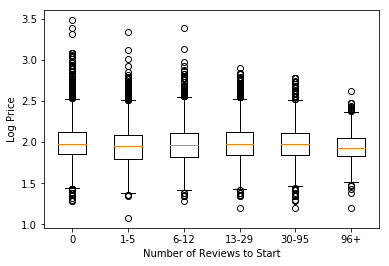

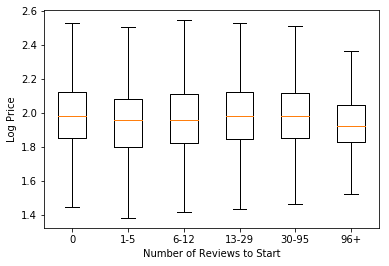

In [72]:
# visualize these groups 

plt.boxplot([paris0.log_price, paris25.log_price, paris50.log_price, paris75.log_price, paris95.log_price, paris100.log_price])
plt.xticks([1,2,3,4,5, 6], ['0', '1-5', '6-12', '13-29', '30-95', '96+'])
plt.xlabel('Number of Reviews to Start')
plt.ylabel('Log Price')
plt.show()

plt.boxplot([paris0.log_price, paris25.log_price, paris50.log_price, paris75.log_price, paris95.log_price, paris100.log_price], showfliers=False)
plt.xticks([1,2,3,4,5, 6], ['0', '1-5', '6-12', '13-29', '30-95', '96+'])
plt.xlabel('Number of Reviews to Start')
plt.ylabel('Log Price')
plt.show()

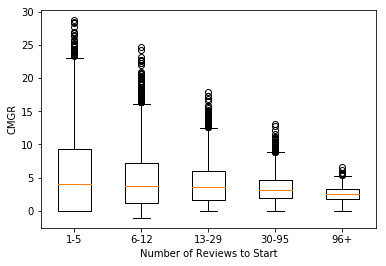

In [73]:
plt.boxplot([paris25.cmg_pct, paris50.cmg_pct, paris75.cmg_pct, paris95.cmg_pct, paris100.cmg_pct])
plt.xticks([1,2,3,4,5], ['1-5', '6-12', '13-29', '30-95', '96+'])
plt.xlabel('Number of Reviews to Start')
plt.ylabel('CMGR')
plt.show()
# as expected, CMGR tends to be lower in rentals that start with a higher number of reviews. 

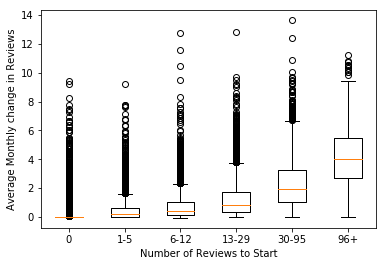

In [74]:
plt.boxplot([paris0.avg_revchange, paris25.avg_revchange, paris50.avg_revchange, paris75.avg_revchange, paris95.avg_revchange, paris100.avg_revchange])
plt.xticks([1,2,3,4,5, 6], ['0', '1-5', '6-12', '13-29', '30-95', '96+'])
plt.xlabel('Number of Reviews to Start')
plt.ylabel('Average Monthly change in Reviews')
plt.show()

Reviews with a high number of reviews to start tend to have a higher monthly increase in reviews. Let's test to see if there is a statistically significant difference between the mean avg change in monthly reviews among these groups. The null hypothesis that:

$H_0$ : $\mu_{1-5 revs}$ = $\mu_{6-12 revs}$ = $\mu_{13-29 revs}$ = $\mu_{30-95 revs}$ = $\mu_{96+ revs}$

Where $\mu$ is the mean monthly average change in reviews. Here, we will be using a significance value of $\alpha = 0.05$, or a 95% confidence interval. To reject the null hypothesis, we need to see $p \leq 0.05$ in the one-way ANOVA test.



In [75]:
import numpy as np 
from scipy import stats

# One-way ANOVA

f, p = stats.f_oneway(paris0.avg_revchange, paris25.avg_revchange, paris50.avg_revchange, 
                      paris75.avg_revchange, paris95.avg_revchange, paris100.avg_revchange)


print('One-way ANOVA')
print('----------------')
print('F value:', f)
print('P value', p)

One-way ANOVA
----------------
F value: 2545.4135837
P value 0.0


We can reject the null hypothesis and say that the mean monthly change in reviews is different. But is it different within each group? We will test with Tukey's test.

In [76]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
paris0['ptile']= 0
paris25['ptile'] = 25
paris50['ptile'] = 50
paris75['ptile'] = 75
paris95['ptile'] = 95
paris100['ptile'] = 100

paris_all = pd.concat([paris0, paris25, paris50, paris75, paris95, paris100])
# combine three dataframes into one

mc = MultiComparison(paris_all.avg_revchange, paris_all.ptile)
result = mc.tukeyhsd()

print(result)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff lower  upper  reject
-------------------------------------------
  0      25    0.3426  0.2725 0.4128  True 
  0      50    0.5798  0.5124 0.6472  True 
  0      75    1.0985  1.0286 1.1685  True 
  0      95    2.126   2.0502 2.2018  True 
  0     100    4.0611  3.9264 4.1957  True 
  25     50    0.2372  0.1585 0.3159  True 
  25     75    0.7559  0.6749 0.8368  True 
  25     95    1.7833  1.6973 1.8694  True 
  25    100    3.7184  3.5778 3.8591  True 
  50     75    0.5187  0.4401 0.5972  True 
  50     95    1.5461  1.4624 1.6299  True 
  50    100    3.4812  3.3419 3.6205  True 
  75     95    1.0275  0.9416 1.1133  True 
  75    100    2.9625  2.822  3.1031  True 
  95    100    1.9351  1.7915 2.0786  True 
-------------------------------------------


/Users/sarahjordan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/sarahjordan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/sarahjordan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

Tukey's test tells us that there is a statistically significant difference in the mean average monthly change in reviews between each of our groups; rentals that start with a high number of reviews tend to get more reviews per month. 

Next, we will want to look at each of these groups to see who is successfully increasing their number of reviews and why. Now we will be interested in the CMGR. 

In [89]:
# look at places wtih 1-5 reviews: 50th ptile cMGR

paris25_cmgr, paris25_cmgr_hi = split_data(paris25, 'cmg_pct', np.percentile(paris25.cmg_pct, 50))
X_cmgr, lm_cmgr, X_cmgr_hi, lm_cmgr_hi = linear_model(paris25_cmgr, paris25_cmgr_hi)
cmgr_df = compare_coefficients(X_cmgr, lm_cmgr, X_cmgr_hi, lm_cmgr_hi)
cmgr_df

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     92.56
Date:                Tue, 27 Mar 2018   Prob (F-statistic):          1.83e-279
Time:                        19:43:32   Log-Likelihood:                 688.50
No. Observations:                1725   AIC:                            -1329.
Df Residuals:                    1701   BIC:                            -1198.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

,variable,coef_sm,se_sm,coef_lg,se_lg,z_score
0,const,1.585581,0.018544,1.587327,0.017462,-0.279875
1,accommodates,0.052522,0.004362,0.045734,0.003804,3.180897
2,bedrooms,0.105779,0.007004,0.119660,0.006240,-4.364121
3,room_type_Private room,-0.163323,0.013761,-0.172710,0.013038,2.132538
4,room_type_Shared room,-0.344597,0.082228,-0.418146,0.060536,1.321680
5,arrondissement_1,0.351177,0.033224,0.331190,0.023839,0.863677
6,arrondissement_2,0.213544,0.031348,0.197483,0.023656,0.780886
7,arrondissement_3,0.267162,0.028679,0.238205,0.020334,1.431825
8,arrondissement_4,0.227028,0.029855,0.279381,0.021114,-2.480354
9,arrondissement_5,0.181833,0.026483,0.188220,0.023377,-0.513287


In [90]:
# look at places wtih 6-12 reviews: 50th ptile CMGR
paris50_cmgr, paris50_cmgr_hi = split_data(paris50, 'cmg_pct', np.percentile(paris50.cmg_pct, 50))
X_cmgr, lm_cmgr, X_cmgr_hi, lm_cmgr_hi = linear_model(paris50_cmgr, paris50_cmgr_hi)
cmgr_df = compare_coefficients(X_cmgr, lm_cmgr, X_cmgr_hi, lm_cmgr_hi)
cmgr_df

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     117.8
Date:                Tue, 27 Mar 2018   Prob (F-statistic):               0.00
Time:                        19:43:40   Log-Likelihood:                 950.14
No. Observations:                1954   AIC:                            -1852.
Df Residuals:                    1930   BIC:                            -1718.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

,variable,coef_sm,se_sm,coef_lg,se_lg,z_score
0,const,1.610216,0.016748,1.582689,0.018035,4.114272
1,accommodates,0.044394,0.003864,0.045262,0.003672,-0.721670
2,bedrooms,0.117769,0.006227,0.123173,0.005990,-3.177754
3,room_type_Private room,-0.158522,0.012368,-0.145307,0.012001,-4.418629
4,room_type_Shared room,-0.286833,0.075338,-0.411922,0.042577,2.012606
5,arrondissement_1,0.339767,0.032489,0.268662,0.025906,3.626522
6,arrondissement_2,0.209961,0.025332,0.200190,0.023250,0.971531
7,arrondissement_3,0.254890,0.020890,0.199230,0.021773,9.064688
8,arrondissement_4,0.239654,0.023557,0.282981,0.021380,-4.380189
9,arrondissement_5,0.208798,0.022661,0.205530,0.021932,0.573020


In [91]:
# look at places with 13-29 reviews: 50th percentile CMGR


paris75_cmgr, paris75_cmgr_hi = split_data(paris75, 'cmg_pct', np.percentile(paris75.cmg_pct, 50))
X_cmgr, lm_cmgr, X_cmgr_hi, lm_cmgr_hi = linear_model(paris75_cmgr, paris75_cmgr_hi)
cmgr_df = compare_coefficients(X_cmgr, lm_cmgr, X_cmgr_hi, lm_cmgr_hi)
cmgr_df

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     101.9
Date:                Tue, 27 Mar 2018   Prob (F-statistic):          1.44e-299
Time:                        19:43:41   Log-Likelihood:                 814.70
No. Observations:                1726   AIC:                            -1581.
Df Residuals:                    1702   BIC:                            -1451.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

,variable,coef_sm,se_sm,coef_lg,se_lg,z_score
0,const,1.601497,0.017066,1.611008,0.018525,-1.320001
1,accommodates,0.041446,0.004061,0.044436,0.003584,-1.565958
2,bedrooms,0.124120,0.006973,0.107293,0.006339,5.792624
3,room_type_Private room,-0.149826,0.013415,-0.149259,0.012764,-0.137387
4,room_type_Shared room,-0.335647,0.068674,-0.310923,0.035921,-0.422406
5,arrondissement_1,0.291226,0.030620,0.249976,0.024288,2.212165
6,arrondissement_2,0.180973,0.024124,0.167567,0.021134,1.152502
7,arrondissement_3,0.255216,0.021590,0.191950,0.020413,8.999715
8,arrondissement_4,0.288255,0.024277,0.274887,0.021002,1.097820
9,arrondissement_5,0.225878,0.022479,0.191313,0.022669,11.810927


In [92]:
# look at places with 30-95 reviews: 50th percentile CMGR


paris95_cmgr, paris95_cmgr_hi = split_data(paris95, 'cmg_pct', np.percentile(paris95.cmg_pct, 50))
X_cmgr, lm_cmgr, X_cmgr_hi, lm_cmgr_hi = linear_model(paris95_cmgr, paris95_cmgr_hi)
cmgr_df = compare_coefficients(X_cmgr, lm_cmgr, X_cmgr_hi, lm_cmgr_hi)
cmgr_df

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     92.40
Date:                Tue, 27 Mar 2018   Prob (F-statistic):          2.45e-257
Time:                        19:43:42   Log-Likelihood:                 812.34
No. Observations:                1372   AIC:                            -1577.
Df Residuals:                    1348   BIC:                            -1451.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

,variable,coef_sm,se_sm,coef_lg,se_lg,z_score
0,const,1.593284,0.020630,1.555123,0.024878,2.744684
1,accommodates,0.052634,0.003774,0.046579,0.004179,3.373956
2,bedrooms,0.102967,0.007220,0.099414,0.007330,2.811314
3,room_type_Private room,-0.120233,0.012912,-0.128881,0.013208,3.113764
4,room_type_Shared room,-0.301702,0.042014,-0.376824,0.037155,3.830360
5,arrondissement_1,0.287605,0.026925,0.287197,0.029688,0.032630
6,arrondissement_2,0.180709,0.025103,0.236559,0.027160,-5.385576
7,arrondissement_3,0.240026,0.022452,0.243899,0.026215,-0.286148
8,arrondissement_4,0.262033,0.023351,0.276985,0.026102,-1.281909
9,arrondissement_5,0.189744,0.025044,0.219891,0.028849,-2.105266


In [272]:
# look at places with 96+ reviews: 50th percentile CMGR


paris100_cmgr, paris100_cmgr_hi = split_data(paris100, 'cmg_pct', np.percentile(paris100.cmg_pct, 50))
X_cmgr, lm_cmgr, X_cmgr_hi, lm_cmgr_hi = linear_model(paris100_cmgr, paris100_cmgr_hi)
cmgr_df = compare_coefficients(X_cmgr, lm_cmgr, X_cmgr_hi, lm_cmgr_hi)
cmgr_df

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     11.10
Date:                Sat, 24 Mar 2018   Prob (F-statistic):           6.69e-29
Time:                        10:29:43   Log-Likelihood:                 189.61
No. Observations:                 343   AIC:                            -331.2
Df Residuals:                     319   BIC:                            -239.1
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

,variable,coef_sm,se_sm,coef_lg,se_lg,z_score
0,const,1.678658,0.085581,1.645156,0.060935,0.557508
1,accommodates,0.031477,0.007768,0.044846,0.007312,-5.099460
2,bedrooms,0.078091,0.017607,0.078895,0.015010,-0.087310
3,room_type_Private room,-0.123129,0.024118,-0.145874,0.025229,3.071925
4,room_type_Shared room,-0.397615,0.087112,-0.154502,0.101048,-4.747535
5,arrondissement_1,0.246688,0.094637,0.140108,0.063925,1.527284
6,arrondissement_2,0.136768,0.091029,0.133258,0.064981,0.055056
7,arrondissement_3,0.148217,0.088532,0.147934,0.062666,0.004515
8,arrondissement_4,0.163257,0.086355,0.159467,0.062058,0.063122
9,arrondissement_5,0.181837,0.091325,0.123218,0.064153,0.901871
